Apply algorithm on digits dataset - LabelEncoding of features: and Train test Division 80%-20%

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

# naive and gaussian model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

# for accuracy
from sklearn import metrics

# print precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

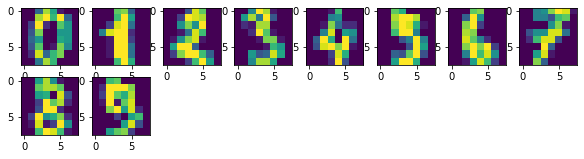

In [2]:
main_data = load_digits()

plt.figure(figsize = (10, 10))

for i in range(10):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])

In [3]:
print(main_data.data)
print()
print(main_data.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

[0 1 2 ... 8 9 8]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(main_data.data, main_data.target, test_size = 0.20, random_state = 3) 

In [6]:
# Gaussina models

gnb = GaussianNB()

# train model
gnb.fit(X_train, Y_train)

# training completed
Y_predicted = gnb.predict(X_test)

print(f"Accuracy :- {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy :- 0.8444444444444444


In [7]:
main_data.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

# True Prediction

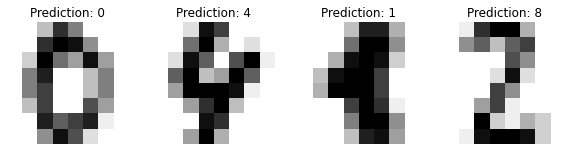

In [8]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [9]:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.85      0.80      0.82        35
           2       0.96      0.71      0.81        31
           3       0.83      0.75      0.79        40
           4       0.97      0.82      0.89        44
           5       0.94      0.84      0.89        38
           6       0.82      0.92      0.87        25
           7       0.75      0.95      0.84        42
           8       0.55      0.93      0.69        29
           9       0.95      0.66      0.78        29

    accuracy                           0.84       360
   macro avg       0.86      0.84      0.84       360
weighted avg       0.87      0.84      0.85       360




Confusion matrix:
[[47  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  2  1  4  0]
 [ 0  0 22  1  0  0  0  0  8  0]
 [ 0  2  1 30  0  0  0  1  6  0]
 [ 0  1  0  0 36  0  2  5  0  0]
 [ 0  0  0  2  0 32  1  1  1  1]
 [ 0  1  0  0  0  1 23  0  0  0]
 [ 0  0  0  0  1  1  0 40  0  0]
 [ 0  0  0  0  0  0  0  2 27  0]
 [ 0  1  0  3  0  0  0  3  3 19]]


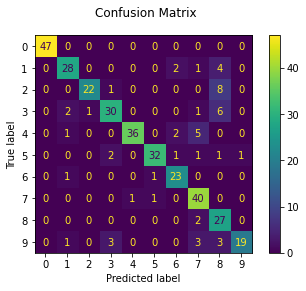

In [19]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()